### Logistic Regression

## Preprocess

In [6]:
import numpy as np
import sys
sys.path.append("../..") # Adds higher directory to python modules path.
from data import preprocess

dat = preprocess.preprocess('../../data/raw/CD_PD.mat')

# print(data[0].names)
d = np.dtype(dat[0]).fields
print('features = ', end='')
for attr in d.keys():
    print(attr, end=' ')
print()

test_x, train_x, test_y, train_y = preprocess.get_all_non_temporal_data(dat, mode='diagnosis')
print('train x\n\tshape =', train_x.shape)
print('train y\n\tshape =', train_y.shape)
print('test x\n\tshape =', test_x.shape)
print('test y\n\tshape =', test_y.shape)

features = age date duration ed gender side TMSE t x y p pt diagnosis clock_drawing 
train x
	shape = (156, 5)
train y
	shape = (156,)
test x
	shape = (40, 5)
test y
	shape = (40,)


## Model

In [38]:
from sklearn.linear_model import LogisticRegression

# create a model
model = LogisticRegression(solver='liblinear', verbose=1)
print('model \t\t=', model)

# fit the model
clf = model.fit(train_x, train_y)
print()
print('classifier \t=', clf)
print('coefficient \t=', model.coef_)
print('iteration \t=', model.n_iter_)

model 		= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)
[LibLinear]
classifier 	= LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)
coefficient 	= [[-0.04882443  0.60707811  0.25243916  0.95497315  0.07137597]]
iteration 	= [7]


## Validation

In [13]:
from sklearn.model_selection import cross_validate


# cross validate
# cv_result = cross_validate(model, val_x, val_y,
#                            verbose=1, return_train_score=True)

## Metrics

prediction
	shape 	= (40,)
prediction probability
	shape 	= (40, 2)
accuracy score 	= 0.625
log loss 	= nan
f1 score 	= 0.7169811320754716


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:2174: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


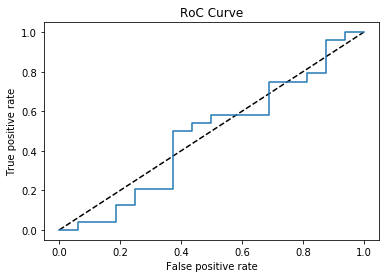

In [48]:
from sklearn.metrics import roc_curve, log_loss, f1_score
import matplotlib.pyplot as plt


# get prediction
pred_y = clf.predict(test_x)
pred_prob_y = clf.predict_proba(test_x)

print('prediction\n\tshape \t=', pred_y.shape)
print('prediction probability\n\tshape \t=', pred_prob_y.shape)

# produce accuracy score
score = clf.score(test_x, test_y)
print('accuracy score \t=', score)

# produce log ros\
log_ls = log_loss(test_y, pred_y)
print('log loss \t=', log_ls)

# produce f1 score
f1 = f1_score(test_y, pred_y)
print('f1 score \t=', f1)

# produce roc curve
fpr, tpr, _ = roc_curve(test_y, pred_prob_y[:, 0])

# plot roc curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("RoC Curve")
plt.show()
